<a href="https://colab.research.google.com/github/ChristoRay/ChrisPortofolioForDS/blob/main/Fifa%2019%20Project%20/EDA_on_Outfield_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [70]:
df = pd.read_csv('/content/df_outfield.csv')
df.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Attacking Work Rate,Defensive Work Rate
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,RF,10.0,170.18,72.12,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226500000.0,Medium,Medium
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,ST,7.0,187.96,83.01,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127100000.0,High,Low
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,LW,10.0,175.26,68.04,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228100000.0,High,Medium
3,3,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,RCM,7.0,180.34,69.85,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196400000.0,High,High
4,4,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,LF,10.0,172.72,73.94,86,86,86,92,91,91,91,92,92,92,92,92,85,85,85,92,69,66,66,66,69,63,52,52,52,63,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,172100000.0,High,Medium


In [71]:
#drop unecessary columns
df.drop(columns=['Unnamed: 0'],inplace = True)

In [72]:
df.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause
count,16122.000000,16122.000000,16122.000000,1.612200e+04,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,1.612200e+04
mean,25.005272,66.461233,71.515631,2.522221e+06,10130.194765,1.115494,3.004590,2.532502,19.424203,180.388683,74.449192,59.836000,59.836000,59.836000,61.058181,60.739921,60.739921,60.739921,61.058181,61.003660,61.003660,61.003660,61.755241,60.241409,60.241409,60.241409,61.755241,59.533805,58.845677,58.845677,58.845677,59.533805,58.827317,57.635157,57.635157,57.635157,58.827317,54.195013,49.762250,57.065190,62.642724,46.745069,60.590125,51.254497,46.433445,56.101786,63.201216,67.915333,67.993735,66.427863,62.204999,66.585163,59.601600,66.019601,67.336373,65.910929,51.441508,59.581938,50.426994,54.823533,55.468986,52.131001,60.350391,51.313050,51.917256,49.634723,4.379962e+06
std,4.547106,6.794631,6.074413,5.711658e+06,22582.379873,0.396542,0.636915,0.617823,15.595258,6.430065,6.716756,9.142763,9.142763,9.142763,9.891451,9.853478,9.853478,9.853478,9.891451,9.782895,9.782895,9.782895,9.264765,8.817549,8.817549,8.817549,9.264765,8.982024,10.093232,10.093232,10.093232,8.982024,9.538665,11.719739,11.719739,11.719739,9.538665,14.128841,16.377475,11.605909,9.785086,14.781959,12.511927,15.145165,15.070673,12.388396,10.013325,11.744513,11.464128,12.343648,8.767710,12.168537,13.228839,11.532420,11.181344,12.597878,15.729601,14.446229,18.798222,14.675196,12.912500,12.510791,10.148784,17.217843,19.171370,19.169624,1.091852e+07
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,1.000000,1.000000,2.000000,2.000000,154.940000,49.900000,33.000000,33.000000,33.000000,27.000000,29.000000,29.000000,29.000000,27.000000,29.000000,29.000000,29.000000,29.000000,32.000000,32.000000,32.000000,29.000000,32.000000,30.000000,30.000000,30.000000,32.000000,31.000000,27.000000,27.000000,27.000000,31.000000,11.000000,10.000000,15.000000,20.000000,10.000000,14.000000,11.000000,10.000000,19.000000,25.000000,20.000000,25.000000,23.000000,21.000000,22.000000,14.000000,28.000000,27.000000,25.000000,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,22.000000,10.000000,10.000000,10.000000,0.000000e+00
25%,21.000000,62.000000,67.000000,3.500000e+05,1000.000000,1.000000,3.000000,2.000000,9.000000,175.260000,69.850000,54.000000,54.000000,54.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,56.000000,54.000000,54.000000,54.000000,56.000000,53.000000,51.000000,51.000000,51.000000,53.000000,52.000000,48.000000,48.000000,48.000000,52.000000,44.000000,36.000000,49.000000,57.000000,35.000000,55.000000,39.000000,34.000000,49.000000,58.000000,62.000000,62.000000,59.000000,56.000000,60.000000,51.000000,59.000000,61.000000,59.000000,40.000000,50.000000,34.00000

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      16122 non-null  object 
 1   Age                       16122 non-null  int64  
 2   Nationality               16122 non-null  object 
 3   Overall                   16122 non-null  int64  
 4   Potential                 16122 non-null  int64  
 5   Club                      16122 non-null  object 
 6   Value                     16122 non-null  float64
 7   Wage                      16122 non-null  float64
 8   Preferred Foot            16122 non-null  object 
 9   International Reputation  16122 non-null  float64
 10  Weak Foot                 16122 non-null  float64
 11  Skill Moves               16122 non-null  float64
 12  Position                  16122 non-null  object 
 13  Jersey Number             16122 non-null  float64
 14  Height

In [74]:
'''looking at these summaries, columns potential and value looks a bit weird, since
there are players that doesn't have value or wage. we'll look into these
'''
#players with value = 0
df[df['Wage']==0]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Attacking Work Rate,Defensive Work Rate
399,L. Paredes,24,Argentina,80,85,No Club,0.0,0.0,Right,2.0,4.0,4.0,CM,5.0,180.34,74.84,73,73,73,77,77,77,77,77,79,79,79,78,81,81,81,78,77,79,79,79,77,76,74,74,74,76,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,0.0,Medium,Medium
476,A. Granqvist,33,Sweden,80,80,No Club,0.0,0.0,Right,2.0,4.0,2.0,LCB,4.0,193.04,83.91,64,64,64,58,60,60,60,58,60,60,60,59,66,66,66,59,70,76,76,76,70,72,81,81,81,72,49.0,51.0,81.0,73.0,37.0,49.0,36.0,40.0,67.0,63.0,46.0,49.0,55.0,76.0,36.0,74.0,64.0,67.0,83.0,59.0,81.0,82.0,54.0,49.0,79.0,78.0,82.0,83.0,79.0,0.0,High,Medium
601,I. Smolnikov,29,Russia,79,79,No Club,0.0,0.0,Right,2.0,3.0,3.0,RB,2.0,177.80,69.85,72,72,72,75,74,74,74,75,75,75,75,77,76,76,76,77,80,77,77,77,80,80,75,75,75,80,73.0,61.0,69.0,79.0,57.0,72.0,49.0,46.0,75.0,72.0,84.0,90.0,80.0,75.0,76.0,67.0,85.0,93.0,68.0,57.0,65.0,71.0,77.0,72.0,41.0,73.0,76.0,76.0,80.0,0.0,High,High
775,A. Dzyuba,29,Russia,78,78,No Club,0.0,0.0,Right,2.0,3.0,3.0,ST,22.0,195.58,91.17,79,79,79,73,76,76,76,73,73,73,73,73,68,68,68,73,54,54,54,54,54,50,50,50,50,50,61.0,79.0,86.0,71.0,74.0,71.0,64.0,60.0,55.0,77.0,66.0,65.0,50.0,75.0,32.0,78.0,63.0,77.0,93.0,68.0,75.0,30.0,78.0,73.0,77.0,70.0,21.0,15.0,19.0,0.0,High,Medium
849,Luís Neto,30,Portugal,77,77,No Club,0.0,0.0,Right,1.0,3.0,2.0,CB,4.0,187.96,71.21,54,54,54,53,53,53,53,53,56,56,56,56,63,63,63,56,69,74,74,74,69,71,77,77,77,71,42.0,33.0,80.0,72.0,40.0,49.0,52.0,43.0,77.0,48.0,57.0,59.0,69.0,78.0,61.0,42.0,79.0,72.0,72.0,37.0,76.0,78.0,44.0,46.0,47.0,72.0,80.0,77.0,78.0,0.0,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,M. Smith,18,Wales,56,75,No Club,0.0,0.0,Right,1.0,2.0,2.0,CDM,23.0,177.80,68.04,49,49,49,52,51,51,51,52,53,53,53,54,55,55,55,54,55,57,57,57,55,55,55,55,55,55,46.0,39.0,38.0,58.0,38.0,50.0,51.0,42.0,54.0,54.0,58.0,60.0,62.0,53.0,68.0,46.0,66.0,58.0,57.0,40.0,62.0,55.0,45.0,52.0,45.0,55.0,51.0,55.0,52.0,0.0,Medium,Medium
15101,J. Lalrinzuala,19,India,56,64,No Club,0.0,0.0,Left,1.0,2.0,2.0,LB,6.0,175.26,68.04,50,50,50,50,48,48,48,50,46,46,46,51,45,45,45,51,56,51,51,51,56,57,54,54,54,57,54.0,36.0,44.0,43.0,34.0,46.0,24.0,40.0,35.0,41.0,76.0,73.0,67.0,54.0,71.0,63.0,63.0,65.0,56.0,32.0,52.0,49.0,47.0,35.0,36.0,44.0,57.0,58.0,53.0,0.0,Medium,Medium
15157,A. Kuruniyan,21,India,56,70,No Club,0.0,0.0,Left,1.0,3.0,2.0,LW,13.0,175.26,69.85,57,57,57,58,57,57,57,58,55,55,55,57,49,49,49,57,44,38,38,38,44,42,34,34,34,42,53.0,47.0,58.0,56.0,39.0,49.0,37.0,48.0,31.0,54.0,76.0,78.0,81.0,54.0,76.0,57.0,52.0,65.0,49.0,49.0,33.0,20.0,58.0,48.0,37.0,41.0,17.0,15.0,12.0,0.0,High,Medium
15185,G. Kostadinov,27,Bulgaria,56,57,No Club,0.0,0.0,Right,1.0,3.0,2.0,LDM,7.0,182.88,73.94,49,49,49,49,49,49,49,49,51,51,51,51,53,53,53,51,55,57,57,57,55,56,57,57,57,56,43.0,36.0,48.0,67.0,28.0,48.0,36.0,35.0,65.0,45.0,57.0,64.0,52.0,52.0,60.0,63.0,55.0,46.0,55.0,32.0,52.0,45.0,34.0,45.0,42.0,45.0,58.0,58.0,67.0,0.0,Medium,High


In [75]:
#looks like, players that doesn't have a club, are not paid, let's see if this is the case here
df[df['Club']=='No Club'][['Value','Wage']].describe()

,Value,Wage
count,196.0,196.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [76]:
#since players with no club doesn't have value and wage, we'll drop these rows
df.drop(df.loc[df['Club']=='No Club'].index,inplace = True)
df.drop(df.loc[df['Value']==0].index,inplace = True)
df.reset_index(drop=True, inplace=True)
df.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause
count,15918.000000,15918.000000,15918.000000,1.591800e+04,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,1.591800e+04
mean,24.983603,66.446539,71.523935,2.554545e+06,10257.884156,1.115781,3.004083,2.533358,19.522553,180.387392,74.444555,59.845521,59.845521,59.845521,61.070549,60.753612,60.753612,60.753612,61.070549,61.017465,61.017465,61.017465,61.764229,60.245068,60.245068,60.245068,61.764229,59.518532,58.830318,58.830318,58.830318,59.518532,58.807576,57.611823,57.611823,57.611823,58.807576,54.188466,49.783578,57.039138,62.644742,46.754492,60.617477,51.282133,46.436299,56.088642,63.222892,67.913431,67.996231,66.446413,62.189157,66.584056,59.612514,66.049190,67.318696,65.911547,51.446790,59.572497,50.397223,54.849227,55.492650,52.115907,60.342882,51.268061,51.879005,49.590652,4.436094e+06
std,4.541327,6.809011,6.081923,5.740956e+06,22697.749026,0.397392,0.637005,0.618239,15.653781,6.429679,6.722722,9.140005,9.140005,9.140005,9.886520,9.846850,9.846850,9.846850,9.886520,9.776503,9.776503,9.776503,9.262013,8.820183,8.820183,8.820183,9.262013,8.991350,10.101945,10.101945,10.101945,8.991350,9.545800,11.722398,11.722398,11.722398,9.545800,14.129959,16.360958,11.611999,9.778864,14.772758,12.502268,15.134658,15.071968,12.382087,9.994216,11.745636,11.465044,12.346095,8.776326,12.182357,13.213163,11.541628,11.183321,12.600625,15.715381,14.430470,18.799664,14.662011,12.894609,12.498331,10.141434,17.199529,19.164464,19.165211,1.097693e+07
min,16.000000,46.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,2.000000,2.000000,154.940000,49.900000,33.000000,33.000000,33.000000,27.000000,29.000000,29.000000,29.000000,27.000000,29.000000,29.000000,29.000000,29.000000,32.000000,32.000000,32.000000,29.000000,32.000000,30.000000,30.000000,30.000000,32.000000,31.000000,27.000000,27.000000,27.000000,31.000000,11.000000,10.000000,15.000000,20.000000,10.000000,14.000000,11.000000,10.000000,19.000000,25.000000,20.000000,26.000000,23.000000,21.000000,22.000000,14.000000,28.000000,27.000000,25.000000,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,29.000000,10.000000,10.000000,10.000000,0.000000e+00
25%,21.000000,62.000000,67.000000,3.500000e+05,1000.000000,1.000000,3.000000,2.000000,9.000000,175.260000,69.850000,54.000000,54.000000,54.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,56.000000,54.000000,54.000000,54.000000,56.000000,53.000000,51.000000,51.000000,51.000000,53.000000,52.000000,48.000000,48.000000,48.000000,52.000000,44.000000,36.000000,49.000000,57.000000,35.000000,55.000000,39.000000,34.000000,49.000000,58.000000,62.000000,62.000000,59.000000,56.000000,60.000000,51.000000,59.000000,61.000000,59.000000,40.000000,50.000000,34.000

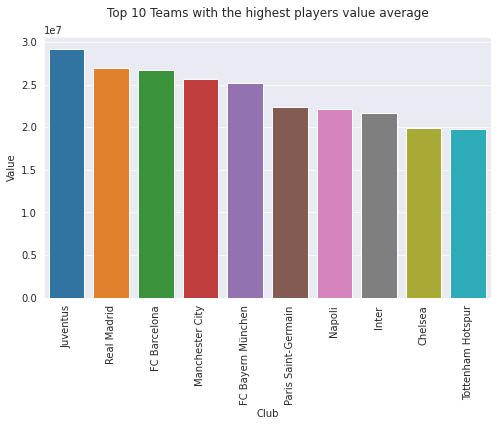

In [77]:
#Which team has the highest average player value ?

average_value_sort = df.groupby('Club').mean()['Value'].sort_values(ascending=False).reset_index().copy()

plt.figure(figsize=(8,4.8))
sns.set_style(style='darkgrid')
sns.barplot(x='Club',y='Value',data = average_value_sort[:10])
plt.title('Top 10 Teams with the highest players value average',pad=20)
plt.xticks(rotation=90)
plt.show()

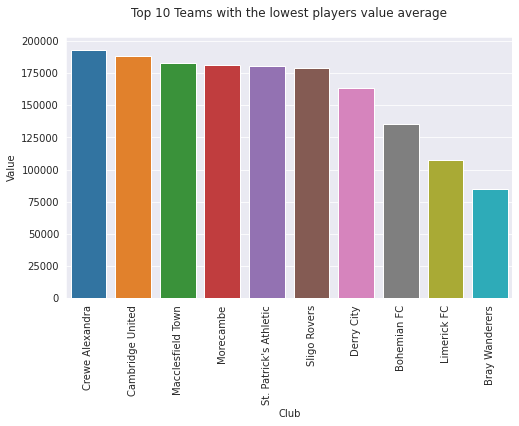

In [78]:
#How about the lowest 10 teams by average player values? 
plt.figure(figsize=(8,4.8))
sns.set_style(style='darkgrid')
sns.barplot(x='Club',y='Value',data = average_value_sort[-10:])
plt.title('Top 10 Teams with the lowest players value average',pad=20)
plt.xticks(rotation=90)
plt.show()

In [79]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Attacking Work Rate,Defensive Work Rate
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,RF,10.0,170.18,72.12,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226500000.0,Medium,Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,ST,7.0,187.96,83.01,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127100000.0,High,Low
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,LW,10.0,175.26,68.04,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228100000.0,High,Medium
3,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,RCM,7.0,180.34,69.85,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196400000.0,High,High
4,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,LF,10.0,172.72,73.94,86,86,86,92,91,91,91,92,92,92,92,92,85,85,85,92,69,66,66,66,69,63,52,52,52,63,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,172100000.0,High,Medium


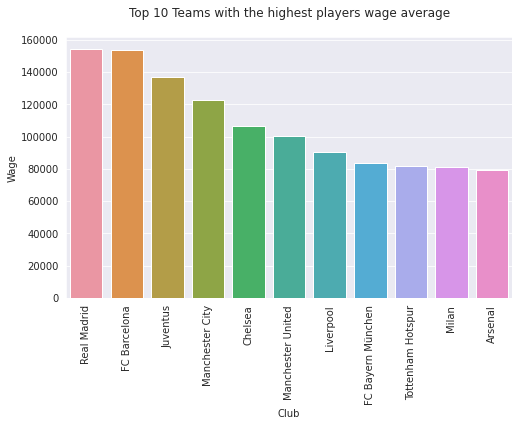

In [80]:
#Which team has the highest average player wage ?

average_wage_sort = df.groupby('Club').mean()['Wage'].sort_values(ascending=False).reset_index().copy()

plt.figure(figsize=(8,4.8))
sns.set_style(style='darkgrid')
sns.barplot(x='Club',y='Wage',data = average_wage_sort[:11])
plt.title('Top 10 Teams with the highest players wage average',pad=20)
plt.xticks(rotation=90)
plt.show()

In [81]:
average_wage_sort.head()

,Club,Wage
0,Real Madrid,154068.965517
1,FC Barcelona,153379.310345
2,Juventus,137181.818182
3,Manchester City,122655.172414
4,Chelsea,106758.620690


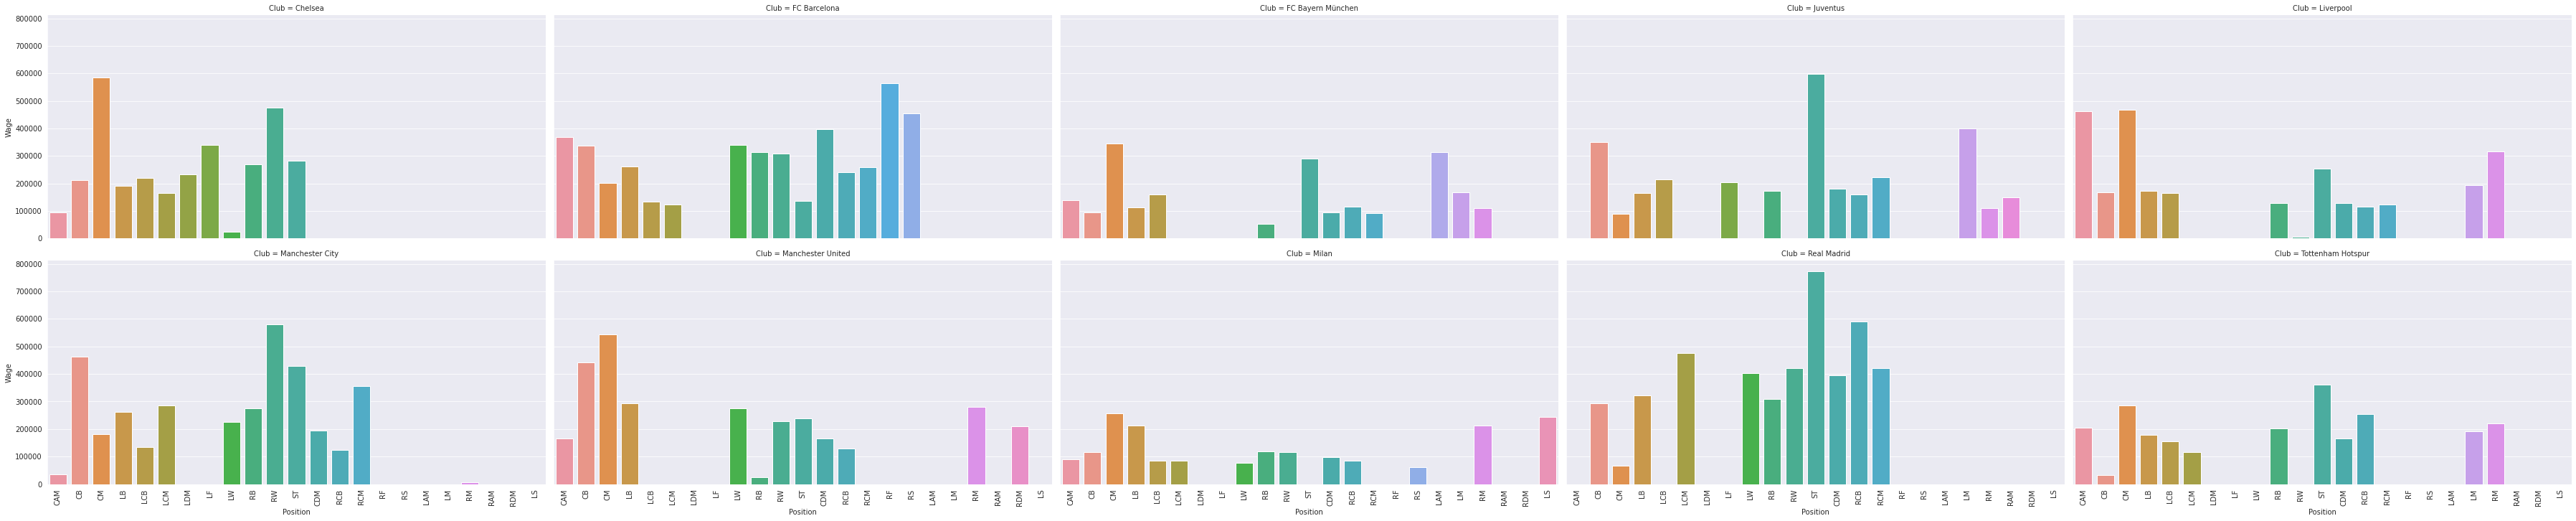

In [97]:
#after knowing which are the top 10 clubs, let's see which position do they spend the most
clubs = average_wage_sort[:10]['Club'].values

top_10_wage = df[df['Club'].isin(clubs)]
top_10_wage = top_10_wage.groupby(['Club','Position']).agg({'Wage':'sum'}).reset_index().copy()
top_10_wage

g = sns.catplot(x='Position',y='Wage',
                col='Club',data=top_10_wage,
                kind='bar',col_wrap = 5,aspect = 2)

g.set_xticklabels(rotation=90)
plt.show()

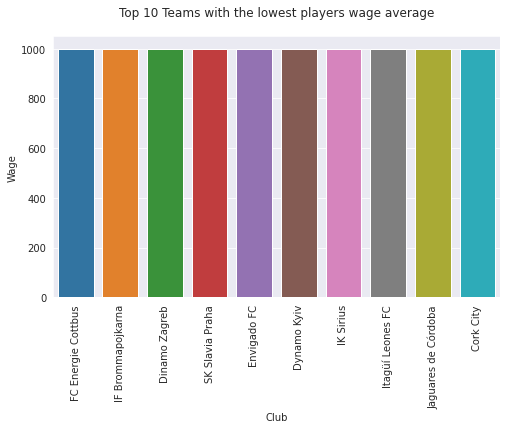

In [83]:
#How about clubs with lowest average player wage ?
plt.figure(figsize=(8,4.8))
sns.set_style(style='darkgrid')
sns.barplot(x='Club',y='Wage',data = average_wage_sort[-10:])
plt.title('Top 10 Teams with the lowest players wage average',pad=20)
plt.xticks(rotation=90)
plt.show()

In [84]:
# well this is a bit weird, let's check how many clubs that have the same lowest average wage
average_wage_sort[average_wage_sort['Wage']<=1000].shape

(32, 2)

In [85]:
'''
looking at the graph above, we'll look into why all of 32 clubs have the same average
wage for players
'''

clubs = average_wage_sort['Club'][-32:].values
clubs_lowest_average = df[df['Club'].isin(clubs)].reset_index().copy()
clubs_lowest_average.groupby('Club').agg({'index':'count','Wage':['sum','count','mean']})

#from this output, we can see that these clubs pays all of their players the same amount

index     Wage              
                       count      sum count    mean
Club                                               
AEK Athens                25  25000.0    25  1000.0
Bohemian FC               22  22000.0    22  1000.0
Boyacá Chicó FC           23  23000.0    23  1000.0
Bray Wanderers            20  20000.0    20  1000.0
Cork City                 23  23000.0    23  1000.0
Deportivo Pasto           26  26000.0    26  1000.0
Dinamo Zagreb             25  25000.0    25  1000.0
Dynamo Kyiv               25  25000.0    25  1000.0
Envigado FC               26  26000.0    26  1000.0
FC Energie Cottbus        26  26000.0    26  1000.0
HJK Helsinki              22  22000.0    22  1000.0
IF Brommapojkarna         24  24000.0    24  1000.0
IK Sirius                 24  24000.0    24  1000.0
Itagüí Leones FC          22  22000.0    22  1000.0
Jaguares de Córdoba       23  23000.0    23  1000.0
Kaizer Chiefs             25  25000.0    25  1000.0
Limerick FC               17  17000.0    17  1000.0
Lokomotiv Moscow          25  25000.0    25  1000.0
Olympiacos CFP            25  25000.0    25  1000.0
Orlando Pirates           24  24000.0    24  1000.0
PAOK                      23  23000.0    23  1000.0
PFC CSKA Moscow           25  25000.0    25  1000.0
Panathinaikos FC          25  25000.0    25  1000.0
SK Slavia Praha           25  25000.0    25  1000.0
Shakhtar Donetsk          25  25000.0    25  1000.0
Shamrock Rovers           20  20000.0    20  1000.0
Sligo Rovers              17  17000.0    17  1000.0
Sparta Praha              25  25000.0    25  1000.0
Spartak Moscow            24  24000.0    24  1000.0
St. Patrick's Athletic    20  20000.0    20  1000.0
Trelleborgs FF            25  25000.0    25  1000.0
Viktoria Plzeň            21  21000.0    21  1000.0

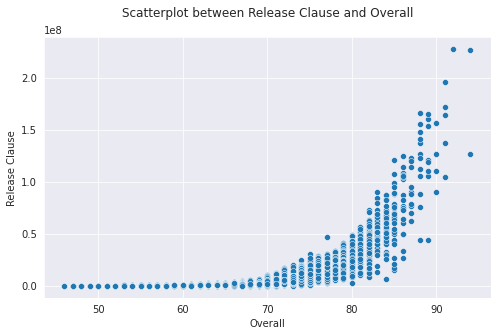

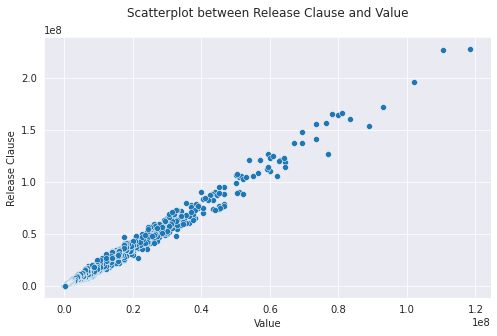

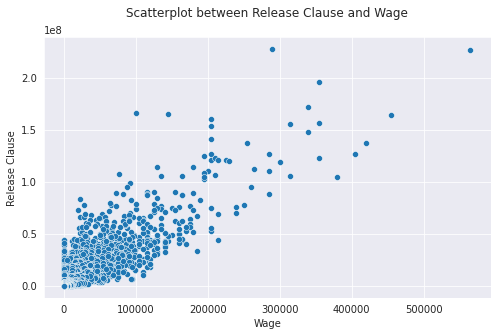

In [86]:
#Now we'll see how Release Clause correlates with Overall, Value and Wage
'''
during the data preprocessing, i substitute players with no Release Clause to 0,
so we'll need to subset the 0 out of it
'''
Release_Clause = df[df['Release Clause']!=0].copy()
cols = ['Overall','Value','Wage']

for i in cols : 
  plt.figure(figsize=(8,4.8))
  sns.set_style(style='darkgrid')
  sns.scatterplot(x=i,y='Release Clause',data = Release_Clause)
  title = 'Scatterplot between Release Clause and ' + i
  plt.title(title,pad=20)
  plt.xticks()
  plt.show()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15918 entries, 0 to 15917
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      15918 non-null  object 
 1   Age                       15918 non-null  int64  
 2   Nationality               15918 non-null  object 
 3   Overall                   15918 non-null  int64  
 4   Potential                 15918 non-null  int64  
 5   Club                      15918 non-null  object 
 6   Value                     15918 non-null  float64
 7   Wage                      15918 non-null  float64
 8   Preferred Foot            15918 non-null  object 
 9   International Reputation  15918 non-null  float64
 10  Weak Foot                 15918 non-null  float64
 11  Skill Moves               15918 non-null  float64
 12  Position                  15918 non-null  object 
 13  Jersey Number             15918 non-null  float64
 14  Height

In [88]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Attacking Work Rate,Defensive Work Rate
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,RF,10.0,170.18,72.12,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226500000.0,Medium,Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,ST,7.0,187.96,83.01,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127100000.0,High,Low
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,LW,10.0,175.26,68.04,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228100000.0,High,Medium
3,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,RCM,7.0,180.34,69.85,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196400000.0,High,High
4,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,LF,10.0,172.72,73.94,86,86,86,92,91,91,91,92,92,92,92,92,85,85,85,92,69,66,66,66,69,63,52,52,52,63,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,172100000.0,High,Medium
